## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

## Setting up directory paths

In [2]:
# Base directory
base_dir = '.'

print(f"Base directory: {base_dir}")

Base directory: .


In [3]:
# Training data directory
train_dir = os.path.join(base_dir, 'train')

print(f"Training directory: {train_dir}")

Training directory: .\train


In [4]:
# Validation data directory
validation_dir = os.path.join(base_dir, 'validation')

print(f"Validation directory: {validation_dir}")

Validation directory: .\validation


In [16]:
# Sample images directory
sample_dir = os.path.join(base_dir, 'sample_images')

print(f"Sample images directory: {sample_dir}")

Sample images directory: .\sample_images


In [6]:
# How many images is in each folder
train_neozep = len(os.listdir(os.path.join(train_dir, 'Neozep')))
train_medicol = len(os.listdir(os.path.join(train_dir, 'Medicol')))
train_kremils = len(os.listdir(os.path.join(train_dir, 'KremilS')))
train_fishoil = len(os.listdir(os.path.join(train_dir, 'FishOil')))
train_decolgen = len(os.listdir(os.path.join(train_dir, 'Decolgen')))
train_dayzinc = len(os.listdir(os.path.join(train_dir, 'DayZinc')))
train_biogesic = len(os.listdir(os.path.join(train_dir, 'Biogesic')))
train_bioflu = len(os.listdir(os.path.join(train_dir, 'Bioflu')))
train_bactidol = len(os.listdir(os.path.join(train_dir, 'Bactidol')))
train_alaxan = len(os.listdir(os.path.join(train_dir, 'Alaxan')))

print(f"Training Neozep: {train_neozep} images")
print(f"Training Medicol: {train_medicol} images")
print(f"Training Kremil S: {train_kremils} images")
print(f"Training Fish Oil: {train_fishoil} images")
print(f"Training Decolgen: {train_decolgen} images")
print(f"Training DayZinc: {train_dayzinc} images")
print(f"Training Biogesic: {train_biogesic} images")
print(f"Training Bioflu: {train_bioflu} images")
print(f"Training Bactidol: {train_bactidol} images")
print(f"Training Alaxan: {train_alaxan} images")

Training Neozep: 800 images
Training Medicol: 800 images
Training Kremil S: 800 images
Training Fish Oil: 800 images
Training Decolgen: 800 images
Training DayZinc: 800 images
Training Biogesic: 800 images
Training Bioflu: 800 images
Training Bactidol: 800 images
Training Alaxan: 800 images


In [7]:
# How many images is in each folder
val_neozep = len(os.listdir(os.path.join(validation_dir, 'Neozep')))
val_medicol = len(os.listdir(os.path.join(validation_dir, 'Medicol')))
val_kremils = len(os.listdir(os.path.join(validation_dir, 'KremilS')))
val_fishoil = len(os.listdir(os.path.join(validation_dir, 'FishOil')))
val_decolgen = len(os.listdir(os.path.join(validation_dir, 'Decolgen')))
val_dayzinc = len(os.listdir(os.path.join(validation_dir, 'DayZinc')))
val_biogesic = len(os.listdir(os.path.join(validation_dir, 'Biogesic')))
val_bioflu = len(os.listdir(os.path.join(validation_dir, 'Bioflu')))
val_bactidol = len(os.listdir(os.path.join(validation_dir, 'Bactidol')))
val_alaxan = len(os.listdir(os.path.join(validation_dir, 'Alaxan')))

print(f"Validation Neozep: {val_neozep} images")
print(f"Validation Medicol: {val_medicol} images")
print(f"Validation Kremil S: {val_kremils} images")
print(f"Validation Fish Oil: {val_fishoil} images")
print(f"Validation Decolgen: {val_decolgen} images")
print(f"Validation DayZinc: {val_dayzinc} images")
print(f"Validation Biogesic: {val_biogesic} images")
print(f"Validation Bioflu: {val_bioflu} images")
print(f"Validation Bactidol: {val_bactidol} images")
print(f"Validation Alaxan: {val_alaxan} images")

Validation Neozep: 200 images
Validation Medicol: 200 images
Validation Kremil S: 200 images
Validation Fish Oil: 200 images
Validation Decolgen: 200 images
Validation DayZinc: 200 images
Validation Biogesic: 200 images
Validation Bioflu: 200 images
Validation Bactidol: 200 images
Validation Alaxan: 200 images


## Sample image visualization

In [19]:
samp_image_path = os.path.join(sample_dir, '00000000.jpg')

print(f"Loading image from: {samp_image_path}")

Loading image from: .\sample_images\00000000.jpg


In [20]:
samp_image = Image.open(samp_image_path)

print(f"Image loaded successfully!")
print(f"Image format: {samp_image.format}")
print(f"Image mode: {samp_image.mode}")
print(f"Image size: {samp_image.size}")

Image loaded successfully!
Image format: JPEG
Image mode: RGB
Image size: (300, 300)


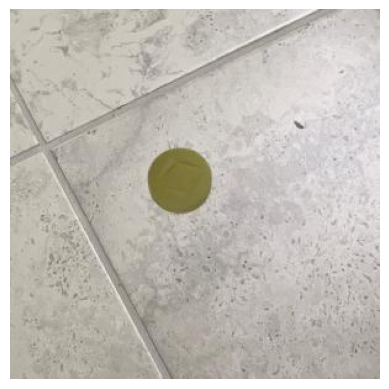

In [22]:
# display the image
plt.imshow(samp_image)
plt.axis('off')
plt.show()

In [23]:
samp_array = np.array(samp_image)

In [24]:
# extract each color channel
red_channel = samp_array[:, :, 0]
green_channel = samp_array[:, :, 1]
blue_channel = samp_array[:, :, 2]

print(f"Red channel shape: {red_channel.shape}")
print(f"Green channel shape: {green_channel.shape}")
print(f"Blue channel shape: {blue_channel.shape}")

Red channel shape: (300, 300)
Green channel shape: (300, 300)
Blue channel shape: (300, 300)


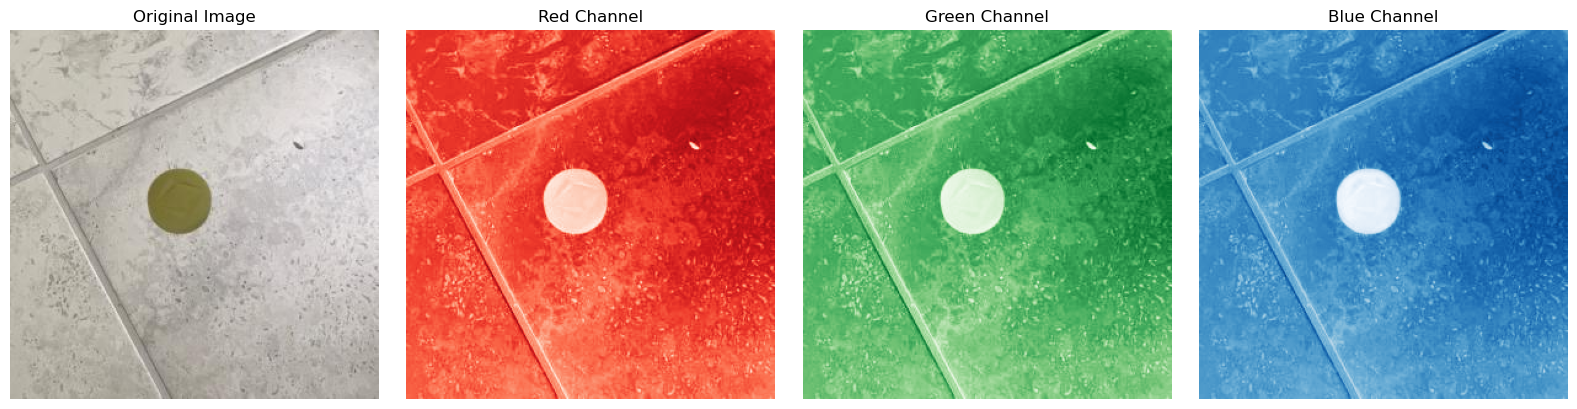

In [26]:
# display all three channels side by side
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# original image
axes[0].imshow(samp_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# red channel
axes[1].imshow(red_channel, cmap='Reds')
axes[1].set_title('Red Channel')
axes[1].axis('off')

# green channel
axes[2].imshow(green_channel, cmap='Greens')
axes[2].set_title('Green Channel')
axes[2].axis('off')

# blue channel
axes[3].imshow(blue_channel, cmap='Blues')
axes[3].set_title('Blue Channel')
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [27]:
# actual pixel values in a small 5x5 region
small_patch = samp_array[50:55, 50:55, 0]

print("Pixel values from a 5x5 patch (Red channel):")
print(small_patch)

Pixel values from a 5x5 patch (Red channel):
[[198 205 205 198 197]
 [200 195 195 200 202]
 [196 176 176 196 204]
 [197 174 174 197 205]
 [199 191 191 199 202]]


## EDA visualization

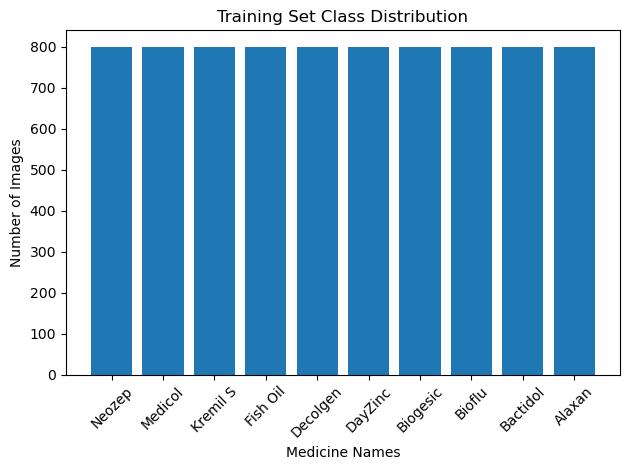

In [10]:
names = [
    "Neozep", "Medicol", "Kremil S", "Fish Oil", "Decolgen","DayZinc", "Biogesic", "Bioflu", 
    "Bactidol", "Alaxan"
]

counts = [
    train_neozep, train_medicol, train_kremils, train_fishoil, train_decolgen, train_dayzinc, 
    train_biogesic,train_bioflu, train_bactidol, train_alaxan
]

plt.bar(classes, counts)
plt.xticks(rotation=45)
plt.xlabel("Medicine Names")
plt.ylabel("Number of Images")
plt.title("Training Set Class Distribution")
plt.tight_layout()
plt.show()

In [15]:
! pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   -- ------------------------------------- 2.4/39.0 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/39.0 MB 10.1 MB/s eta 0:00:04
   ----- ---------------------------------- 5.5/39.0 MB 9.1 MB/s eta 0:00:04
   ------- -------------------------------- 7.1/39.0 MB 8.4 MB/s eta 0:00:04
   --------- ------------------------------ 9.4/39.0 MB 8.9 MB/s eta 0:00:04
   ------------ --------------------------- 11.8/39.0 MB 9.3 MB/s eta 0:00:03
   --------------- ------------------------ 15.2/39.0 MB 10.2 MB/s eta 0:00:03
   ------------------ --------------------- 18.1/39.0 MB 10.7 MB/s eta 0:00:02
   --------------------- ------------------ 21.0/39.0 MB 10.9 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/39.0 MB 11.3 MB/s eta 0:00:02
   --------------------------- ------------ 27.0/39.0 MB 11.5 MB/s eta 0:00:02
   ------------------------------- -------- 30.4/39.0 MB 11.8 MB/s eta

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.6 which is incompatible.
